In [2]:
from src.minor_report import date_agg_table
from pandas.plotting._matplotlib.style import get_standard_colors

In [3]:
def multiplot(df, cols=None, spacing=0.1,**kwargs):
    cols = cols or df.columns
    colors = get_standard_colors(num_colors=len(cols))

    ax = df.loc[:, cols[0]].plot(label=cols[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=cols[0])
    lines, labels = ax.get_legend_handles_labels()

    for n in range(1, len(cols)):
        ax_new = ax.twinx()
        ax_new.spines["right"].set_position(("axes", 1 + spacing * (n - 1)))
        df.loc[:, cols[n]].plot(
            ax=ax_new, label=cols[n], color=colors[n % len(colors)], **kwargs
        )
        ax_new.set_ylabel(ylabel=cols[n])
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label
    ax.legend(lines, labels, loc=0)

In [4]:
df = date_agg_table.get_full_df("complete")

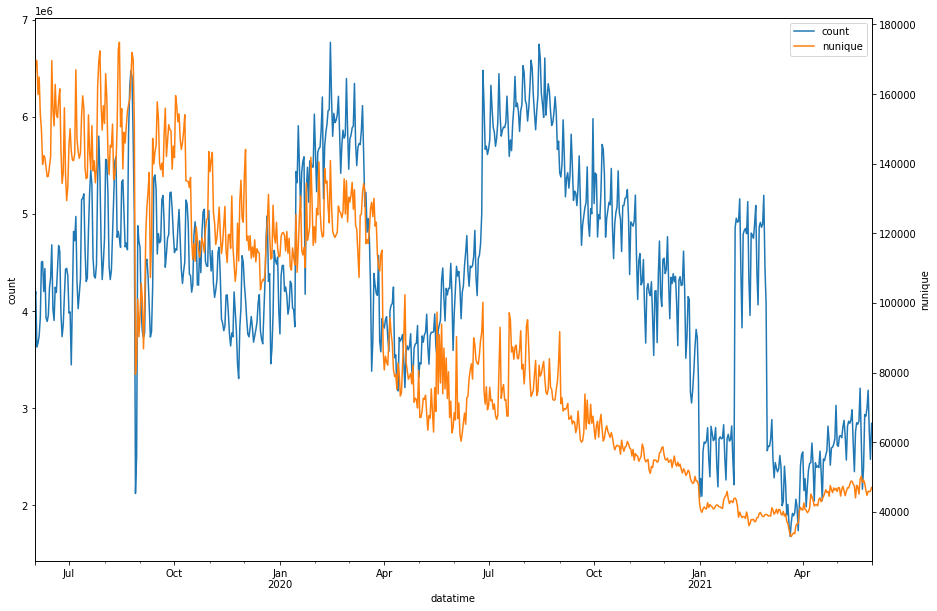

In [5]:
multiplot(df, figsize=(15,10))